# Check Spectra Code

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import compute_spectra as sp
%matplotlib inline

In [2]:
file = 'H1_detrended.0050-01.nc'
ds = Dataset(file,'r')
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(31), nlat(171), nlon(154)
    variables(dimensions): float64 time(time), float64 ULONG(nlat,nlon), float64 ULAT(nlat,nlon), float64 TLONG(nlat,nlon), float64 TLAT(nlat,nlon), float64 Ug_detrended(time,nlat,nlon), float64 Ua_detrended(time,nlat,nlon), float64 Vg_detrended(time,nlat,nlon), float64 Va_detrended(time,nlat,nlon), float64 zetag_detrended(time,nlat,nlon), float64 zetaa_detrended(time,nlat,nlon), float64 rho_detrended(time,nlat,nlon), float64 rho_surf(time,nlat,nlon), float64 DXU(nlat,nlon), float64 DYU(nlat,nlon), float64 DXT(nlat,nlon), float64 DYT(nlat,nlon), float64 TAREA(nlat,nlon), float64 UAREA(nlat,nlon)
    groups: 

In [3]:
u = ds.variables['Ug_detrended']
zeta = ds.variables['zetag_detrended']

In [11]:
dx = 1000.
u1 = u[0,0:170,:]
#u1 = np.swapaxes(u1,0,2)

zeta1 = zeta[0,0:170,:]
#zeta1 = np.swapaxes(zeta1,0,2)

In [12]:
print(u1.shape, zeta1.shape)

(170, 154) (170, 154)


In [13]:
spec_u = sp.TWODimensional_spec(u1, dx, dx, detrend=False,han_win=False)
ki = spec_u['ki']
print('Spatial mean', np.mean(0.5*u1*u1))
print('Spectral mean', np.sum(spec_u['spec']/(1.e8*u1.shape[0]*u1.shape[1])))
print('Iso spectral mean', np.sum(spec_u['ispec'])*(ki[1]-ki[0]))

Spatial mean 460.76708827279236
Spectral mean 0.1244232462573752
Iso spectral mean 450.22336552209555


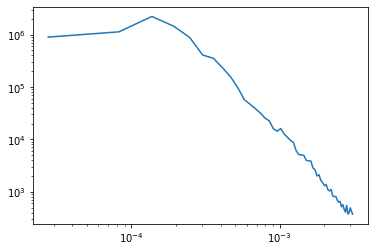

In [14]:
plt.loglog(ki,spec_u['ispec'])

In [15]:
spec_zeta = sp.TWODimensional_helmholtz(zeta1, zeta1, dx, dx, detrend=False,han_win=False)

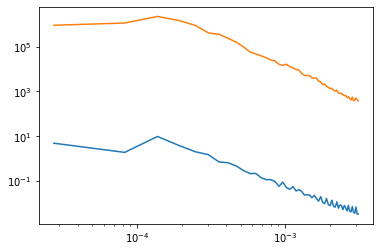

In [16]:
plt.loglog(ki,spec_zeta['ispec_psi'])
plt.loglog(ki,spec_u['ispec'])

In [20]:
a = np.where(lat[:,0] == np.find_nearest(lat[:,0] == 30.))

AttributeError: module 'numpy' has no attribute 'find_nearest'

In [33]:
kappa2 = spec_zeta['kk1']**2 + spec_zeta['kk2']**2

In [35]:
kappa2[0:5,0:5]

array([[0.00000000e+00, 4.21656266e-13, 1.68662506e-12, 3.79490639e-12,
        6.74650025e-12],
       [3.46020761e-13, 7.67677027e-13, 2.03264582e-12, 4.14092715e-12,
        7.09252101e-12],
       [1.38408304e-12, 1.80573931e-12, 3.07070811e-12, 5.17898944e-12,
        8.13058330e-12],
       [3.11418685e-12, 3.53584312e-12, 4.80081191e-12, 6.90909324e-12,
        9.86068710e-12],
       [5.53633218e-12, 5.95798845e-12, 7.22295724e-12, 9.33123857e-12,
        1.22828324e-11]])